# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Chest X-Ray Classification | Xception | 98% </p>

![Chest X-Ray (1).png](attachment:7e662cec-4fcf-4ec5-bcdd-482a83bf6361.png)

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">About Author</p>
##### ***Hello, I'm  Muhammad_Abdullah : A Data Science Enthusiast and Kaggle 2x Expert***

Greetings! I'm delighted to welcome you into my world of data science exploration and innovation. I'm **Muhammad_Abdullah**, a passionate data scientist with a fervent dedication to unraveling the mysteries hidden within datasets and leveraging the power of machine learning to drive meaningful insights and solutions.

###### ***A Passion for Data Science***

Since the inception of my journey into the captivating realm of data science, I've been driven by an insatiable curiosity and an unwavering passion for uncovering the stories embedded in data. From the thrill of diving deep into complex datasets to the exhilaration of crafting predictive models that shape our understanding of the world, data science has become not just a profession but a lifelong passion.

###### ***Guiding Light on Kaggle***

As a Kaggle 2x Expert, I've had the privilege of sharing my knowledge, insights, and experiences with the vibrant Kaggle community. Through meticulously crafted notebooks, engaging discussions, and collaborative projects, I've had the opportunity to mentor aspiring data enthusiasts, foster a culture of learning and growth, and contribute to the collective pursuit of excellence in data science.

###### ***Let's Explore Together***

Join me on an exhilarating adventure into the dynamic world of data science! Together, we'll unlock the potential of data, unravel its mysteries, and embark on a transformative journey of discovery and innovation. Whether you're a seasoned data enthusiast or just beginning your data science odyssey, I'm excited to share this journey with you and explore the endless possibilities that data science has to offer.
<div style="text-align: left;">
    <table>
        <tr>
            <th><b>Website</b></th>
            <th><b>Links</b></th>
        </tr>
        <tr>
        </tr>
        <tr>
            <td>GitHub</td>
            <td><a href="https://github.com/muhammadabdullah0303"><img src="https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github" alt="GitHub"/></a></td>
        </tr>
        <tr>
            <td>LinkedIn</td>
            <td><a href="https://www.linkedin.com/in/muhammad-abdullah-6b84b4297/"><img src="https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin" alt="LinkedIn"/></a></td>
        </tr>
        <tr>
        </tr>
        <tr>
            <td>Facebook</td>
            <td><a href="https://web.facebook.com/abd.sentaflexmental"><img src="https://img.shields.io/badge/Facebook-Profile-blue?style=for-the-badge&logo=facebook" alt="Facebook"/></a></td>
        </tr>
        <tr>
            <td>Gmail</td>
            <td><a href="mailto:mrabdullah@gmail.com"><img src="https://img.shields.io/badge/Gmail-Contact%20Me-red?style=for-the-badge&logo=gmail" alt="Gmail"/></a></td>
        </tr>
    </table>
</div>


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Importing Libraries</p>

In [1]:
#Import Os and Basis Libraries
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Matplot Images
import matplotlib.image as mpimg
# Tensflor and Keras Layer and Model and Optimize and Loss
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras.losses import BinaryCrossentropy
#Kernel Intilizer
from sklearn.preprocessing import LabelEncoder
# import tensorflow_hub as hub
from tensorflow.keras.optimizers import Adam , Adamax
#PreTrained Model
from tensorflow.keras.applications import *
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
# Warnings Remove
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
# Montar Google Drive
drive.mount('/content/drive')

# Definir la ruta de la carpeta con las imágenes
path = '/content/drive/MyDrive/Proyecto VAI-AAI/chest_xray'

Mounted at /content/drive


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Load Data</p>

In [2]:
# Directory containing the "Train" folder
directory = path + "/train"

filepath =[]
label = []

folds = os.listdir(directory)

for fold in folds:
    f_path = os.path.join(directory , fold)

    imgs = os.listdir(f_path)

    for img in imgs:

        img_path = os.path.join(f_path , img)
        filepath.append(img_path)
        label.append(fold)

#Concat data paths with labels
file_path_series = pd.Series(filepath , name= 'filepath')
Label_path_series = pd.Series(label , name = 'label')
df_train = pd.concat([file_path_series ,Label_path_series ] , axis = 1)

In [3]:
# Head
df_train

,filepath,label
0,/content/drive/MyDrive/Proyecto VAI-AAI/chest_...,PNEUMONIA
1,/content/drive/MyDrive/Proyecto VAI-AAI/chest_...,PNEUMONIA
2,/content/drive/MyDrive/Proyecto VAI-AAI/chest_...,PNEUMONIA
3,/content/drive/MyDrive/Proyecto VAI-AAI/chest_...,PNEUMONIA
4,/content/drive/MyDrive/Proyecto VAI-AAI/chest_...,PNEUMONIA
...,...,...
5213,/content/drive/MyDrive/Proyecto VAI-AAI/chest_...,NORMAL
5214,/content/drive/MyDrive/Proyecto VAI-AAI/chest_...,NORMAL
5215,/content/drive/MyDrive/Proyecto VAI-AAI/chest_...,NORMAL
5216,/content/drive/MyDrive/Proyecto VAI-AAI/chest_...,NORMAL


In [4]:
# Directory containing the "Train" folder
directory = path + "/test"

filepath =[]
label = []

folds = os.listdir(directory)

for fold in folds:
    f_path = os.path.join(directory , fold)

    imgs = os.listdir(f_path)

    for img in imgs:

        img_path = os.path.join(f_path , img)
        filepath.append(img_path)
        label.append(fold)

#Concat data paths with labels
file_path_series = pd.Series(filepath , name= 'filepath')
Label_path_series = pd.Series(label , name = 'label')
df_test = pd.concat([file_path_series ,Label_path_series ] , axis = 1)

In [5]:
# Head
df_test.sample(5)

,filepath,label
532,/content/drive/MyDrive/Proyecto VAI-AAI/chest_...,PNEUMONIA
550,/content/drive/MyDrive/Proyecto VAI-AAI/chest_...,PNEUMONIA
456,/content/drive/MyDrive/Proyecto VAI-AAI/chest_...,PNEUMONIA
516,/content/drive/MyDrive/Proyecto VAI-AAI/chest_...,PNEUMONIA
42,/content/drive/MyDrive/Proyecto VAI-AAI/chest_...,NORMAL


In [6]:
# Shape
print(f"The shape of The Train data is: {df_train.shape}")
print(f"The shape of The Test data is: {df_test.shape}")

The shape of The Train data is: (5218, 2)
The shape of The Test data is: (624, 2)


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Making Train Test And Validation Datasets</p>

In [9]:
#Data_Dir
data_dir = path + '/train'
test_dir = path + '/test'

IMAGE_SIZE = (256,256)

print('Training Images:')
# Creating the training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset='training',
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

#Testing  Data
print('Validation Images:')
validation_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset='validation',
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

print('Testing Images:')
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)


Training Images:
Found 5218 files belonging to 2 classes.
Using 4697 files for training.
Validation Images:
Found 5218 files belonging to 2 classes.
Using 521 files for validation.
Testing Images:
Found 624 files belonging to 2 classes.


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Encoding Labels</p>


In [10]:
# Extract labels
train_labels = train_ds.class_names
test_labels = test_ds.class_names
validation_labels = validation_ds.class_names

# Encode Labels

# Define your class labels
class_labels = ['NORMAL', 'PNEUMONIA']

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder on the class labels
label_encoder.fit(class_labels)

# Transform the labels for training dataset
train_labels_encoded = label_encoder.transform(train_labels)

# Transform the labels for validation dataset
validation_labels_encoded = label_encoder.transform(validation_labels)

# Transform the labels for test dataset
test_labels_encoded = label_encoder.transform(test_labels)

In [11]:
# Shape of the dataset
for image_batch, labels_batch in train_ds:
    print("Shape of X_train: ", image_batch.shape)
    print("Shape of y_train: ", labels_batch.shape)
    break

Shape of X_train:  (32, 256, 256, 3)
Shape of y_train:  (32,)


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Normalizing Pixel Value</p>


In [12]:
# Normalizing Pixel Values

# Train Data
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
# Val Data
validation_ds = validation_ds.map(lambda x, y: (x / 255.0, y))
# Test Data
test_ds = test_ds.map(lambda x, y: (x / 255.0, y))

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Visual Count of Train Label</p>


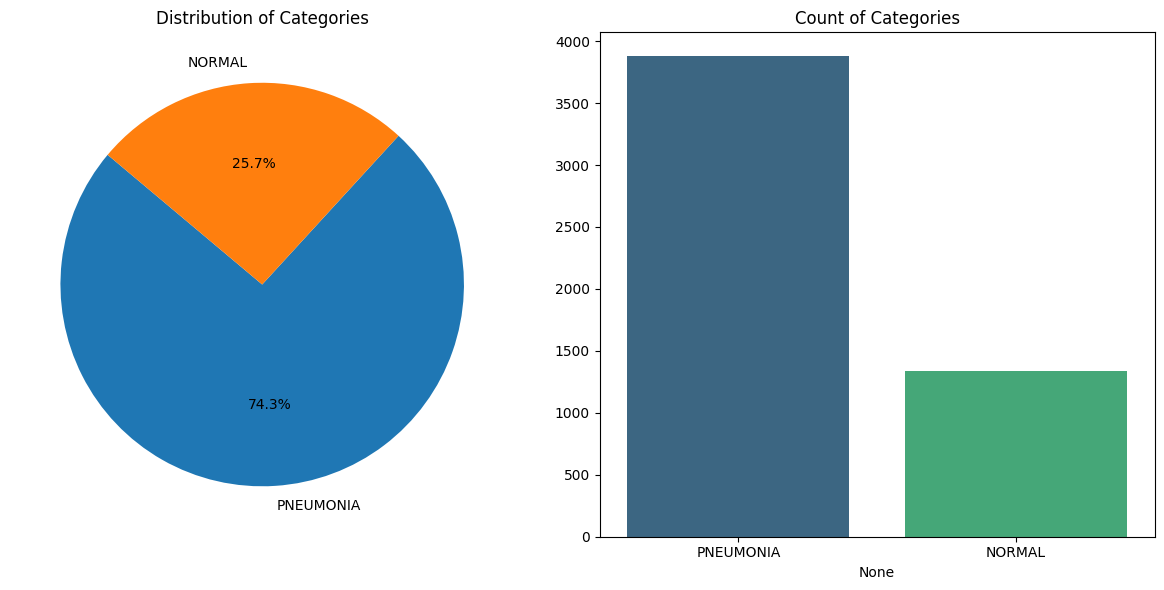

In [13]:
# Count the occurrences of each category in the 'category' column
count = df_train['label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Visual Count of Test Label</p>


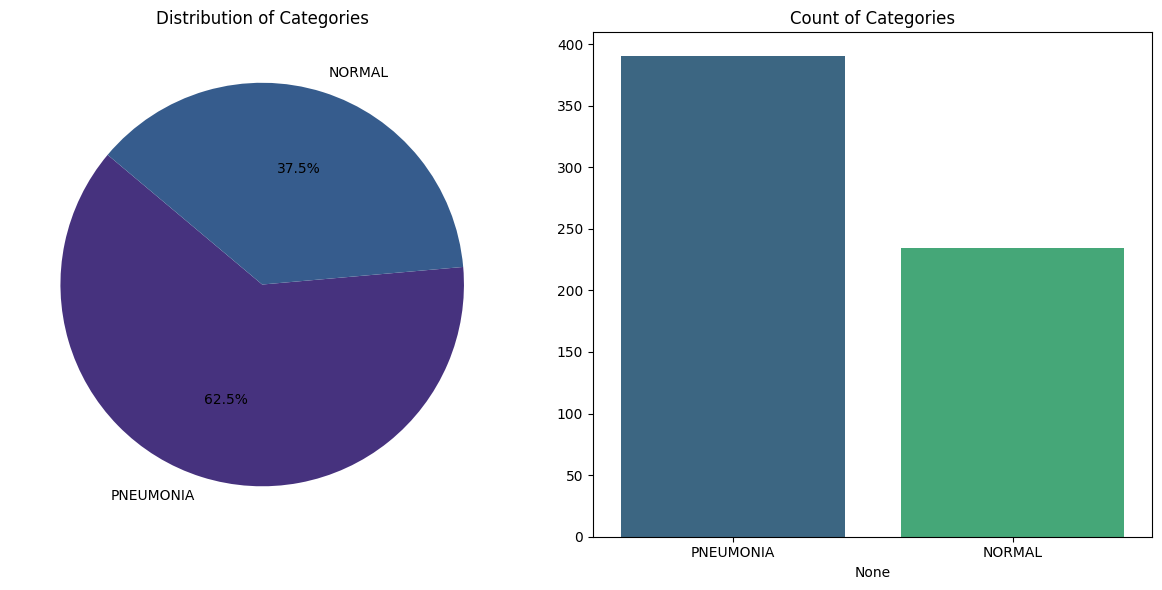

In [14]:
# Count the occurrences of each category in the 'category' column
count = df_test['label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Visualizing Train Images</p>

In [15]:
def visualize_images(path, num_images=5):
    # Get a list of image filenames in the specified path
    image_filenames = os.listdir(path)

    # Limit the number of images to visualize if there are more than num_images
    num_images = min(num_images, len(image_filenames))

    # Create a figure and axis object to display images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3),facecolor='white')

    # Iterate over the selected images and display them
    for i, image_filename in enumerate(image_filenames[:num_images]):
        # Load the image using Matplotlib
        image_path = os.path.join(path, image_filename)
        image = mpimg.imread(image_path)

        # Display the image
        axes[i].imshow(image)
        axes[i].axis('off')  # Turn off axis
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display the figure
    plt.tight_layout()
    plt.show()

###### **<h1 align="center"><span style="color:#6A5ACD;">NORMAL Images</span>**

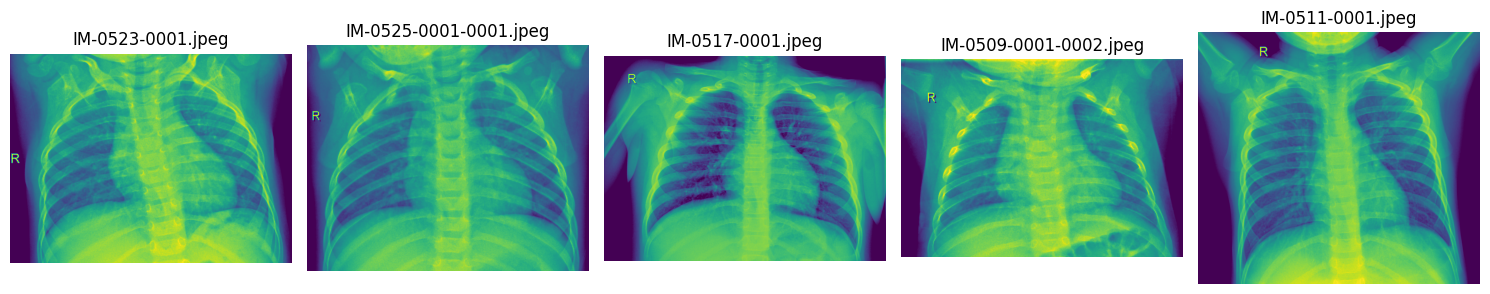

In [16]:
# Specify the path containing the images to visualize
path_to_visualize = path + "/train/NORMAL"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

###### **<h1 align="center"><span style="color:#6A5ACD;">PNEUMONIA Images</span>**

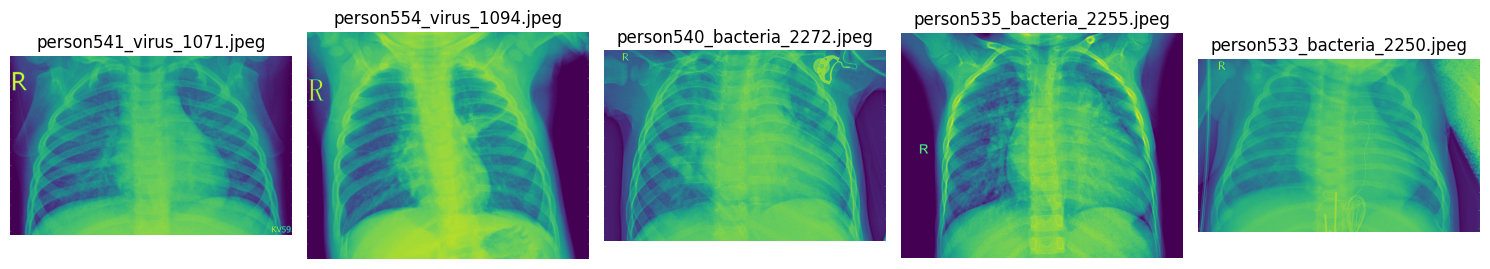

In [17]:
# Specify the path containing the images to visualize
path_to_visualize = path + "/train/PNEUMONIA"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Model Building</p>

###### **<h1 align="center"><span style="color:#6A5ACD;">Transfer Learning</span>**
    
**Transfer learning is a machine learning technique where knowledge gained from training one model is applied to a different but related task. Instead of starting from scratch, a pre-trained model is used as a starting point. By leveraging features learned during the training of the pre-trained model, the new model can achieve better performance with less data and computation. This approach is particularly useful when working with limited labeled data or computational resources. Transfer learning involves fine-tuning the pre-trained model by adjusting its parameters to better suit the new task. This process allows for faster convergence and improved generalization to the new task. Overall, transfer learning accelerates the development of models for various tasks by capitalizing on the knowledge learned from previous tasks.**



1. `base_model = Xception(weights='imagenet', include_top=False, pooling='avg', input_shape=(256, 256, 3))`:
   - `Xception`: This loads the Xception model architecture, a deep convolutional neural network, which is pre-trained on the ImageNet dataset.
   - `weights='imagenet'`: Specifies that the model should be initialized with pre-trained weights from the ImageNet dataset.
   - `include_top=False`: Excludes the top (classification) layer of the model, which allows us to add our own custom classification layers.
   - `pooling='avg'`: Uses global average pooling to convert the 3D output tensor of the base model into a 1D tensor.
   - `input_shape=(256, 256, 3)`: Specifies the input shape of the images expected by the model.

2. `base_model.trainable = False`:
   - Freezes the layers in the base model, preventing them from being updated during training.

3. `model = Sequential()`:
   - Initializes a sequential model where layers are added sequentially.

4. `model.add(base_model)`:
   - Adds the pre-trained Xception base model to the sequential model.

5. `model.add(BatchNormalization())`:
   - Adds a batch normalization layer to normalize the activations of the previous layer.

6. `model.add(Dropout(0.45))`:
   - Adds a dropout layer with a dropout rate of 0.45 to prevent overfitting by randomly dropping a fraction of input units during training.

7. `model.add(Dense(220, activation='relu'))`:
   - Adds a fully connected dense layer with 220 units and ReLU activation function.

8. `model.add(Dropout(0.25))`:
   - Adds another dropout layer with a dropout rate of 0.25.

9. `model.add(Dense(60,activation='relu'))`:
   - Adds another fully connected dense layer with 60 units and ReLU activation function.

10. `model.add(Dense(1, activation='sigmoid'))`:
    - Adds the output layer with 1 unit and sigmoid activation function for binary classification.

11. `model.compile(optimizer=Adamax(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])`:
    - Compiles the model with the Adamax optimizer and a learning rate of 0.001, binary crossentropy loss function for binary classification, and accuracy as the evaluation metric.

12. `model.summary()`:
    - Prints a summary of the model architecture, including the number of parameters in each layer.

In [18]:
# Load the Xception base model without the top (classification) layer
base_model = ResNet50(include_top=False, input_shape=(256, 256, 3), pooling='avg', classes=2, weights='imagenet')

# Freeze the layers in the base model
base_model.trainable = False

# Build Model
model = Sequential()

# Base Model
model.add(base_model)

# Batch Normalization
model.add(BatchNormalization())

# Dropout Layer
model.add(Dropout(0.45))

# Dense Layer 1
model.add(Dense(220, activation='relu'))

# Dropout Layer
model.add(Dropout(0.25))

# Dense Layer 2
model.add(Dense(60,activation='relu'))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer=Adamax(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 batch_normalization (Batch  (None, 2048)              8192      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 220)               450780    
                                                                 
 dropout_1 (Dropout)         (None, 220)               0         
                                                                 
 dense_1 (Dense)             (None, 60)                13

###### **<h1 align="center"><span style="color:#6A5ACD;">Compile and Fitting</span>**

In [ ]:
#Early_Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#Fitting Model
history = model.fit_generator(train_ds,
                        epochs= 20,
                        validation_data = validation_ds,
                        callbacks = early_stopping)

Epoch 1/20
147/147 [==============================] - 939s 6s/step - loss: 0.2503 - accuracy: 0.9061 - val_loss: 0.6266 - val_accuracy: 0.7639
Epoch 2/20
147/147 [==============================] - 50s 327ms/step - loss: 0.1724 - accuracy: 0.9274 - val_loss: 0.4408 - val_accuracy: 0.7639
Epoch 3/20
147/147 [==============================] - 51s 334ms/step - loss: 0.1500 - accuracy: 0.9395 - val_loss: 0.2220 - val_accuracy: 0.8906
Epoch 4/20
147/147 [==============================] - 51s 333ms/step - loss: 0.1418 - accuracy: 0.9457 - val_loss: 0.1370 - val_accuracy: 0.9616
Epoch 5/20
147/147 [==============================] - 54s 340ms/step - loss: 0.1374 - accuracy: 0.9459 - val_loss: 0.1129 - val_accuracy: 0.9616
Epoch 6/20
147/147 [==============================] - 56s 371ms/step - loss: 0.1303 - accuracy: 0.9487 - val_loss: 0.1078 - val_accuracy: 0.9635
Epoch 7/20
147/147 [==============================] - 50s 323ms/step - loss: 0.1193 - accuracy: 0.9583 - val_loss: 0.1021 - val_accu

###### **<h1 align="center"><span style="color:#6A5ACD;">Val Loss and Accuracy</span>**

In [ ]:
# Evaluate the model on the validation dataset
validation_loss, validation_accuracy = model.evaluate(validation_ds)

# Print the validation loss and accuracy
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

17/17 [==============================] - 5s 180ms/step - loss: 0.0959 - accuracy: 0.9674
Validation Loss: 0.09591955691576004
Validation Accuracy: 0.9673704504966736


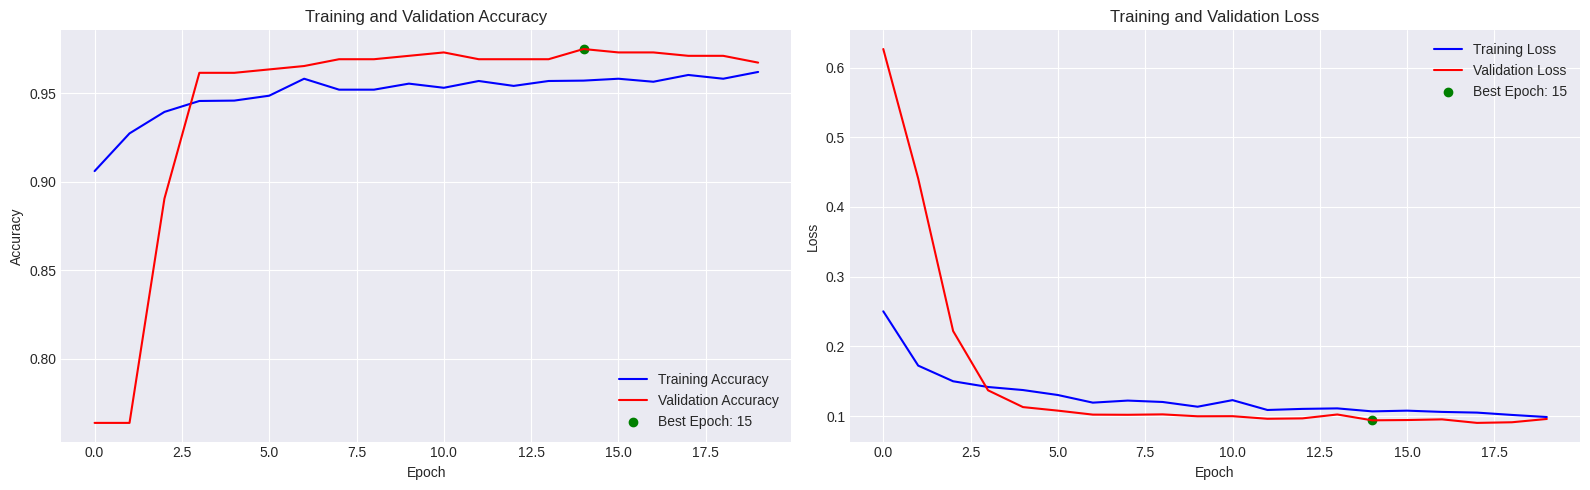

In [ ]:
# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Set the background style
plt.style.use('seaborn-darkgrid')

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Model Predictions</p>

Testing Images:
Found 624 files belonging to 2 classes.
Testing Images:
20/20 [==============================] - 142s 4s/step


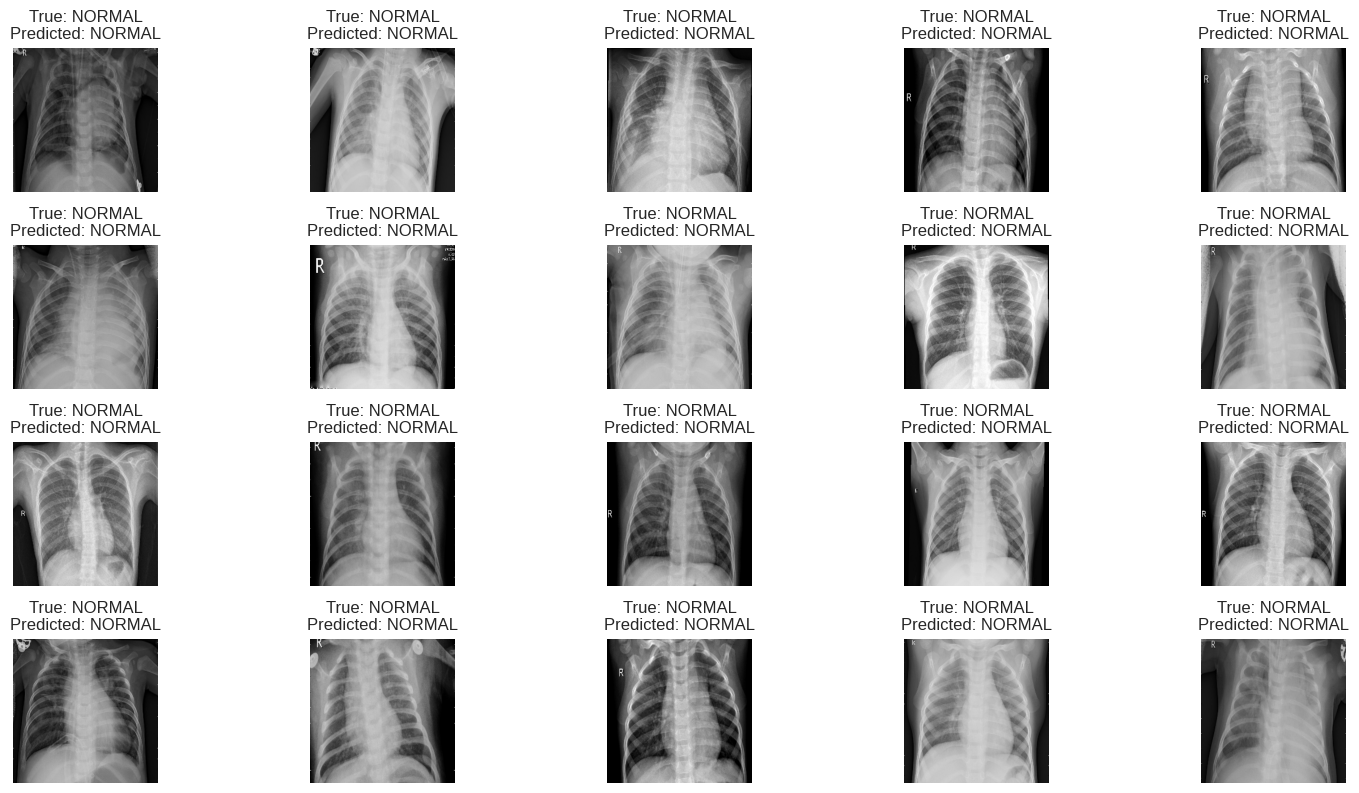

In [ ]:
test_dir = path + '/test/'
print('Testing Images:')
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

# Define a function to plot images with their true and predicted labels
def plot_images_with_predictions(model, dataset, class_labels, num_images=40, num_images_per_row=5):
    # Generate predictions for a set number of images
    predictions = model.predict(dataset)

    # Shuffle the dataset
    dataset_shuffled = dataset.shuffle(buffer_size=len(dataset))

    plt.figure(figsize=(15, 10))
    for i, (images, labels) in enumerate(dataset_shuffled.take(num_images)):
        # Convert tensor to NumPy array
        images = images.numpy()

        # Iterate over each image in the batch
        for j in range(len(images)):
            if i * num_images_per_row + j < num_images:  # Check if the total number of images exceeds the desired count
                predicted_class = class_labels[np.argmax(predictions[i * num_images_per_row + j])]
                true_class = class_labels[np.argmax(labels[j])]

                plt.subplot(num_images // num_images_per_row + 1, num_images_per_row, i * num_images_per_row + j + 1)
                plt.imshow(images[j].astype("uint8"))
                plt.title(f'True: {true_class}\nPredicted: {predicted_class}')
                plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize predictions on random 20 images from the testing dataset
print('Testing Images:')
plot_images_with_predictions(model, test_ds, class_labels, num_images=20)

1/1 [==============================] - 0s 22ms/step


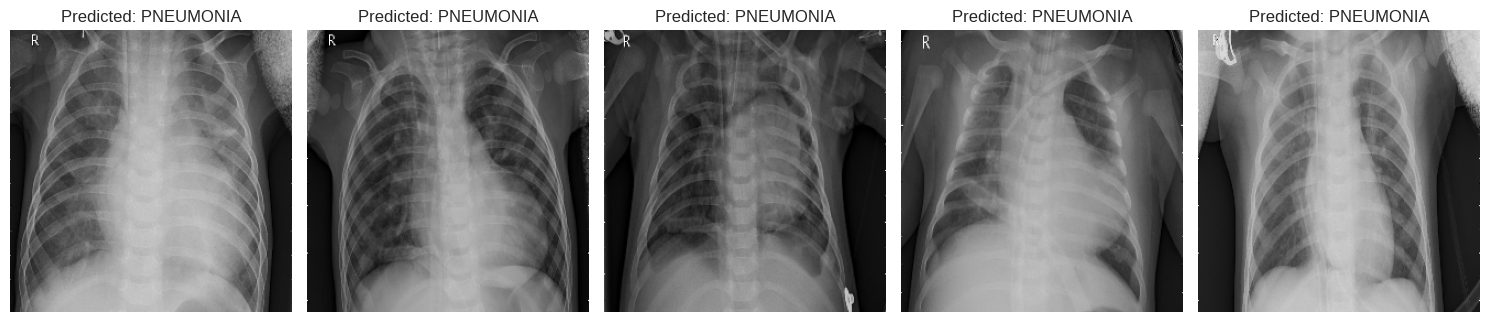

In [ ]:
# Path to the directory containing the images
directory_path = path + '/test/PNEUMONIA/'

# Select N image files from the directory
image_files = os.listdir(directory_path)[:5]

# Create a figure and axes for subplots
fig, axs = plt.subplots(1, len(image_files), figsize=(15, 5))

# Load and preprocess each image, make predictions, and display them using a loop
for i, image_file in enumerate(image_files):
    img_path = os.path.join(directory_path, image_file)
    # Load the image using OpenCV
    img = cv2.imread(img_path)
    # Resize the image to (256, 256)
    img = cv2.resize(img, (256, 256))

    # Normalize pixel values
    img_array = img.astype(np.float32) / 255.0

    # Expand the dimensions to match the input shape expected by the model
    img_array = np.expand_dims(img_array, axis=0)

    # Make predictions
    predictions = model.predict(img_array)
    actual_prediction = (predictions > 0.5).astype(int)

    # Display the image with predicted label
    # Convert BGR to RGB for displaying with matplotlib
    axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[i].axis('off')
    if actual_prediction[0][0] == 0:
        predicted_label = 'Normal'
    else:
        predicted_label = 'PNEUMONIA'
    axs[i].set_title(f'Predicted: {predicted_label}')

# Adjust layout
plt.tight_layout()
plt.show()